In [3]:
!pip install eli5

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [7]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/nikitagupta09/Datascience/main/income_evaluation7%20-%20cleaned.csv"
)

In [8]:
# Viewing data in the file
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5108 entries, 0 to 5107
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5108 non-null   int64 
 1   workclass       5108 non-null   object
 2   fnlwgt          5108 non-null   int64 
 3   education       5108 non-null   object
 4   education-num   5108 non-null   int64 
 5   marital-status  5108 non-null   object
 6   occupation      5108 non-null   object
 7   relationship    5108 non-null   object
 8   race            5108 non-null   object
 9   sex             5108 non-null   object
 10  capital-gain    5108 non-null   int64 
 11  capital-loss    5108 non-null   int64 
 12  hours-per-week  5108 non-null   int64 
 13  native-country  5108 non-null   object
 14  income          5108 non-null   object
dtypes: int64(6), object(9)
memory usage: 598.7+ KB
None


In [10]:
# checking if the any data is missing
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

--> This code  below creates a heatmap using Seaborn to visualize the correlation matrix of a DataFrame data, showing how each variable is related to each other. The heatmap displays correlation values as colors, making it easy to identify patterns and relationships between variables.

<ipython-input-11-b63d4d78e58f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


<Axes: >

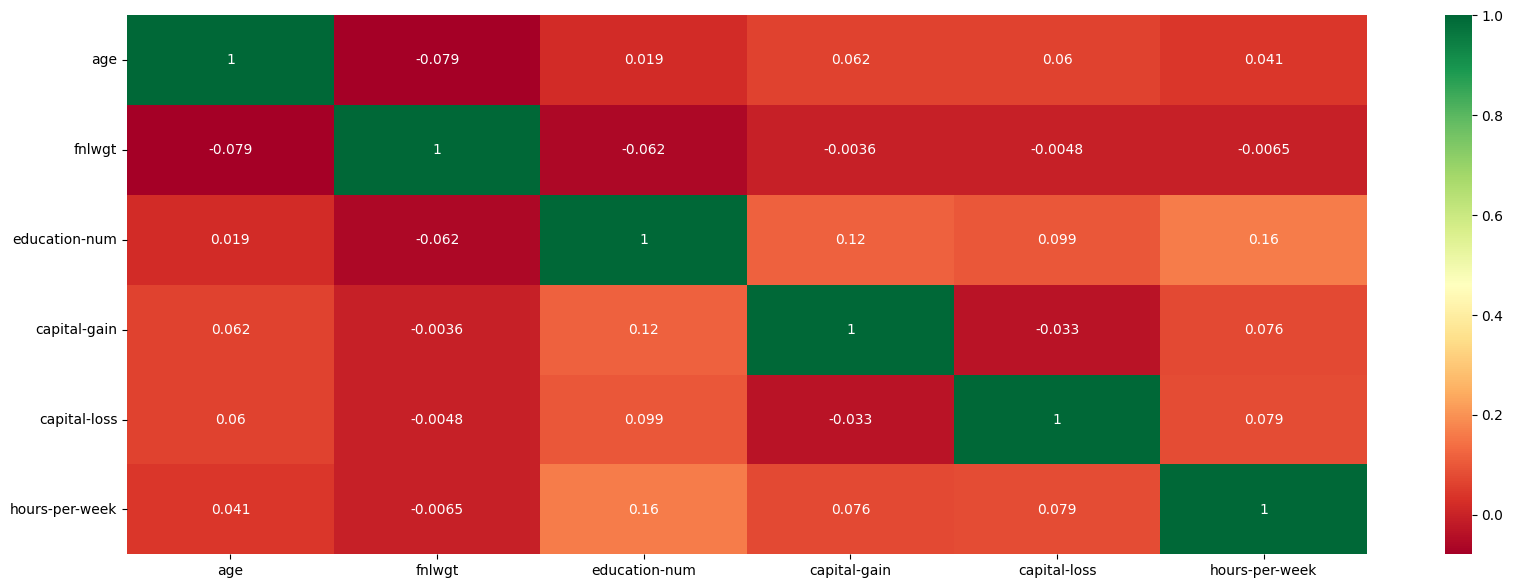

In [11]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

In [12]:
print(data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object




--> 1. Encodes the 'income' variable as 0 and 1, assuming '>50K' as 1 and '<=50K' as 0, or similar categorization.
2. Replaces the original 'income' column in the dataset with the encoded version.
Uses the encoded 'income' variable along with other features ('age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week') to create a linear regression model using the statsmodels library (sm).
3. Fits the model to the data using Ordinary Least Squares (OLS) regression.
Prints the summary of the model, which includes statistical information about the model's performance and the coefficients of the features.



In [15]:
# Encoding the 'income' variable as 0 and 1
# Assuming '>50K' as 1 and '<=50K' as 0, or similar categorization
import statsmodels.api as sm
income_encoded = data['income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)

# Replacing the 'income' column in the dataset with the encoded version
data['income_encoded'] = income_encoded

# Creating the model with the encoded 'income' variable
X = sm.add_constant(data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])
y = data['income_encoded']

model = sm.OLS(y, X).fit()

# Printing the summary of the model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         income_encoded   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     246.1
Date:                Sun, 25 Feb 2024   Prob (F-statistic):          3.71e-277
Time:                        02:49:22   Log-Likelihood:                -2279.6
No. Observations:                5108   AIC:                             4573.
Df Residuals:                    5101   BIC:                             4619.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.7120      0.032    -22.092      0.000      -0.775      -0.649
age                0.0064      0.000     16.249      0.000       0.006       0.007
fnlwgt          3.354e-08   5.01e-08      0.669      0.503   -6.47e-08    1.32e-07
education-num      0.0435      0.002     20.362      0.000       0.039       0.048
capital-gain     1.01e-05   7.51e-07     13.443      0.000    8.63e-06    1.16e-05
capital-loss       0.0001    1.3e-05      9.234      0.000    9.47e-05       0.000
hours-per-week     0.0060      0.000     13.455      0.000       0.005       0.007
==============================================================================
Omnibus:                      539.727   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              693.207
Skew:                           0.886   Prob(JB):                    2.97e-151
Kurtosis:                       2.659   Cond. No.                     1.33e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--> This code creates a new DataFrame df by selecting specific columns ('age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week') from the original DataFrame data and then removes any rows with missing values (NaN) from the new DataFrame.

In [16]:
df = data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].dropna() #subset the dataframe

--> 1. This code calculates z-scores for each column in a pandas DataFrame data and
then removes rows that contain any z-score greater than a specified threshold (e.g., z-score > 3), considering them as outliers.
2. It then resets the index of the cleaned DataFrame and prints the number of rows that were removed.
3.  Finally, data_cleaned contains the dataset with outliers removed.






In [17]:
import numpy as np

# Assuming 'data' is a pandas DataFrame
# Calculate z-scores for each column
z_scores = (data - data.mean()) / data.std()

# Define a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Remove rows with any z-score greater than the threshold
data_cleaned = data[(np.abs(z_scores) < threshold).all(axis=1)]

# Reset index after removing rows
data_cleaned.reset_index(drop=True, inplace=True)

# Print the number of rows removed
print(f"Number of outliers removed: {len(data) - len(data_cleaned)}")

# data_cleaned now contains the dataset with outliers removed


Number of outliers removed: 5108


<ipython-input-17-47f2abd8210b>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (data - data.mean()) / data.std()
<ipython-input-17-47f2abd8210b>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores = (data - data.mean()) / data.std()


--> This code calculates the Variance Inflation Factor (VIF) for each feature in a DataFrame data. VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity in the data.

1. It selects the independent variables ('age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week') from the DataFrame data.
2. It creates an empty DataFrame vif_data to store the VIF values.
3. It calculates the VIF for each feature using the variance_inflation_factor function from statsmodels.stats.outliers_influence.
4. It prints the VIF values for each feature in the DataFrame vif_data.





In [18]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


          feature        VIF
0             age   7.129890
1          fnlwgt   3.679677
2   education-num  11.302874
3    capital-gain   1.032544
4    capital-loss   1.064934
5  hours-per-week  10.213151


In [19]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5103,54,Self-emp-not-inc,212165,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,<=50K,0
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K,0
5105,33,Private,205649,Assoc-acdm,12,Married-spouse-absent,Craft-repair,Not-in-family,White,Male,0,0,20,United-States,<=50K,0
5106,57,Private,109638,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1672,45,United-States,<=50K,0


--> this code prepares the data for training and evaluating a machine learning model by splitting it into training and test sets.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming you have already defined X and y

X = data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = data['income']

#Spliting data into Training 70%, Test set 30%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

--> This code snippet prints the length of the y_test variable. In a machine learning context, y_test typically represents the true labels or target values of the test set.
Printing its length can provide information on the number of samples in the test set, which is useful for understanding the size of the test data being used for evaluation.






In [21]:
print(len(y_test))

1533


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import pandas as pd




-->This code snippet performs Ridge regression on a dataset to predict the 'income_encoded' variable based on features such as age, education level, and capital gains.
It first splits the data into training and testing sets, then trains a Ridge regression model on the training data and evaluates its performance on the testing data using R^2 scores.

In [23]:

# Define features and target variable
X = data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
y = data['income_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Ridge regression model
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)

# Optionally, you can evaluate the model's performance
print("Training score:", ridge.score(X_train, y_train))
print("Testing score:", ridge.score(X_test, y_test))


Training score: 0.2254551970455153
Testing score: 0.22017783997657092


--> This code snippet imports the necessary libraries and assumes that X_train and y_train are already defined.
 It then initializes a Ridge regression model with an alpha (regularization strength) of 0.5, fits the model to the training data, and stores the trained model in the variable ridge.


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Assuming you have already defined X_train and y_train

# Ridge regression with an alpha of 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train, y_train)


Ridge(alpha=0.5)

--> this code snippet uses the trained Ridge regression model (ridge) to make predictions (y_pred) on the test data (X_test). It then prints the length of y_pred, which corresponds to the number of predictions made. Finally, it imports the mean_squared_error function from scikit-learn and computes the mean squared error between the predicted values (y_pred) and the actual target values for the test data.






In [25]:
y_pred = ridge.predict(X_test)
print(len(y_pred))
from sklearn.metrics import mean_squared_error

1022


--> this code snippet computes the root mean squared error (RMSE) between the predicted values (y_pred) and the actual target values (y_test) for the test data. Here's a breakdown:

1. Make Predictions: The trained Ridge regression model (ridge) is used to
     predict the target variable (y_pred) for the test data (X_test).

2. Check Shapes: The shapes of y_test and y_pred are printed to ensure they have the same number of samples.

3. Calculate RMSE: The RMSE is calculated using the mean_squared_error function from scikit-learn, which computes the mean squared error between y_test and y_pred. The square root of this value gives the RMSE, a measure of the model's performance in predicting the target variable.

In [26]:
# rmse after regularization
# Assuming you have already defined y_test and X_test

# Make predictions on the test data
y_pred = ridge.predict(X_test)
# Check the shapes of y_test and y_pred
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)

# Ensure the shapes match
assert y_test.shape == y_pred.shape, "Number of samples in y_test and y_pred are not the same!"

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

Shape of y_test: (1022,)
Shape of y_pred: (1022,)
RMSE: 0.381127530447609


In [27]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


--> This code snippet uses the select_dtypes method of a pandas DataFrame (data) to separate numerical and categorical columns.

1. numerical_columns is a list of column names containing numerical data, obtained by including columns with data types that are numbers.
2. categorical_columns is a list of column names containing categorical data, obtained by excluding columns with numerical data types.
-- The code then prints these two lists to separate numerical and categorical columns in the DataFrame.

In [28]:
import pandas as pd

# Assuming 'data' is your DataFrame
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Print the lists of numerical and categorical columns
print("Numerical columns:")
print(numerical_columns)
print("\nCategorical columns:")
print(categorical_columns)


Numerical columns:
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income_encoded']

Categorical columns:
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


--> This code snippet continues from the previous one and further processes the DataFrame (data) by creating new DataFrames for numerical and categorical columns:

1. numerical_data is created by selecting only the columns from data that contain numerical data. It is a DataFrame containing only the numerical columns.
2.  categorical_data is created by selecting only the columns from data that contain categorical data. It is a DataFrame containing only the categorical columns.
-- The code then prints the first few rows of both numerical_data and categorical_data to show the separation of numerical and categorical data.






In [29]:
import pandas as pd

# Assuming 'data' is your DataFrame
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
categorical_columns = data.select_dtypes(exclude=['number']).columns.tolist()

# Create new DataFrames for numerical and categorical columns
numerical_data = data[numerical_columns].copy()
categorical_data = data[categorical_columns].copy()

# Example to show the new datasets
print("Numerical data:")
print(numerical_data.head())
print("\nCategorical data:")
print(categorical_data.head())


Numerical data:
   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income_encoded  
0               0  
1               0  
2               0  
3               0  
4               0  

Categorical data:
          workclass  education      marital-status         occupation  \
0         State-gov  Bachelors       Never-married       Adm-clerical   
1  Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
2           Private    HS-grad            Divorced  Handlers-cleaners   
3           Private       11th  Married-civ-spouse  Handlers-cleaners   
4           Priva

In [30]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=ec93285b2d700bfc965878fff02cf3ce278473f07dcc163600be310855622aca
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [31]:
import h2o

# Assuming you have already defined the variable 'data'

# Initialize H2O
h2o.init()

# Create H2OFrame from your data
data = h2o.H2OFrame(data)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp4iff2tm7
  JVM stdout: /tmp/tmp4iff2tm7/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp4iff2tm7/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_3yh1lg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [32]:
data

age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_encoded
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


--> This code splits the data DataFrame into two separate H2O frames: one for training and one for testing. The split is performed randomly with a seed value of 1234 for reproducibility. The resulting training frame is named "train.hex" and the testing frame is named "test.hex".

In [33]:
train, test = data.split_frame(seed = 1234, destination_frames = ["train.hex", "test.hex"])

--> This code snippet creates a new column called "is_train" in both the train and test DataFrames. It sets the value to 1 in the train DataFrame and 0 in the test DataFrame. Then, it combines the train and test DataFrames into a new DataFrame called drift_data using the rbind method. Finally, it converts the "is_train" column in drift_data to a factor (categorical) column.

In [34]:
# check the number of train set and test set
train["is_train"] = 1
test["is_train"] = 0

drift_data = train.rbind(test)
drift_data["is_train"] = drift_data["is_train"].asfactor()

--> This code calculates the frequency table of the "is_train" column in the drift_data DataFrame. It shows the count of each unique value in the column, which in this case are 0 and 1, indicating the distribution of training and testing instances in the combined DataFrame.






In [35]:
drift_data["is_train"].table()

is_train,Count
0,1279
1,3829


--> This code creates a list x containing all column names from the train frame except for the column named "income". It first converts the column names of train into a set to remove duplicates, then subtracts the set containing just "income" from this set of column names, and finally converts the result back into a list. This operation effectively creates a list of column names that are not "income".

In [36]:
x = list(set(train.col_names) - set(["income"]))

In [37]:
pip install --upgrade h2o


In [38]:
import h2o
h2o.init(max_mem_size="4G")  # Adjust memory size as per your system's capacity


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,51 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_3yh1lg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [39]:
!pip install h2o

In [40]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

hf = h2o.import_file('https://raw.githubusercontent.com/nikitagupta09/Datascience/main/income_evaluation7%20-%20cleaned.csv')

# If 'income' is a binary classification target, convert it to a factor
hf['income'] = hf['income'].asfactor()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 min 10 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,2 months and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_3yh1lg
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


--> This code snippet demonstrates how to use H2O's AutoML to train a machine learning model for binary classification. Here's a brief explanation of each step:

1. Splitting Data: The data is split into training and testing sets using split_frame, with 80% for training and 20% for testing.

2. Defining Predictors and Response: The predictors (x) are set to all columns except the "income" column, which is set as the response (y).

3. Converting Response to Factor: Since it's a binary classification problem, the response column in both the training and testing sets is converted to a factor using asfactor().

4. Running H2OAutoML: The H2OAutoML object is initialized with parameters such as max_models (maximum number of models to build) and seed (random seed). Then, the train method is called with predictors (x), response (y), and the training frame (train).

5. Viewing Leaderboard: The leaderboard of models generated by AutoML is printed to see the performance of each model.

In [44]:
#Split the data into train and test sets
train, test = hf.split_frame(ratios=[.8], seed=1234)

# Identify predictors and response
x = train.columns
y = "income"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run H2OAutoML
aml = H2OAutoML(max_models=15, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_AllModels_1_AutoML_2_20240225_25716     0.912186   0.307041  0.794989                0.182019  0.31331   0.0981629
StackedEnsemble_BestOfFamily_1_AutoML_2_20240225_25716  0.912089   0.306698  0.79634                 0.193399  0.312977  0.0979544
GBM_5_AutoML_2_20240225_25716                           0.910699   0.31062   0.794868                0.181943  0.314623  0.0989879
GBM_3_AutoML_2_20240225_25716                           0.908548   0.315887  0.786667                0.181727  0.317357  0.100716
GBM_1_AutoML_2_20240225_25716                           0.908528   0.315686  0.782099                0.189116  0.317641  0.100896
GBM_2_AutoML_2_20240225_25716                           0.908275   0.315203  0.789443                0.190779  0.316777  

--> This code snippet retrieves the leaderboard generated by the AutoML process (aml) and then displays the top entries of the leaderboard using lb.head(). The leaderboard typically shows the performance metrics of the trained models, allowing you to compare their performance and select the best model for further evaluation or deployment.



In [45]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_2_20240225_25716,0.912186,0.307041,0.794989,0.182019,0.31331,0.0981629
StackedEnsemble_BestOfFamily_1_AutoML_2_20240225_25716,0.912089,0.306698,0.79634,0.193399,0.312977,0.0979544
GBM_5_AutoML_2_20240225_25716,0.910699,0.31062,0.794868,0.181943,0.314623,0.0989879
GBM_3_AutoML_2_20240225_25716,0.908548,0.315887,0.786667,0.181727,0.317357,0.100716
GBM_1_AutoML_2_20240225_25716,0.908528,0.315686,0.782099,0.189116,0.317641,0.100896
GBM_2_AutoML_2_20240225_25716,0.908275,0.315203,0.789443,0.190779,0.316777,0.100347
XGBoost_3_AutoML_2_20240225_25716,0.908141,0.313908,0.787089,0.192913,0.317458,0.10078
GBM_grid_1_AutoML_2_20240225_25716_model_1,0.908094,0.31711,0.783029,0.179596,0.317269,0.10066
XGBoost_grid_1_AutoML_2_20240225_25716_model_2,0.905757,0.32138,0.779509,0.195937,0.321144,0.103133
GBM_4_AutoML_2_20240225_25716,0.90494,0.32367,0.781314,0.182219,0.320902,0.102978


--> This code snippet selects the best model from the AutoML leaderboard (aml.leader) and evaluates its performance using the test dataset (test). The model_performance method calculates and returns various performance metrics for the selected model, which can be used to assess its effectiveness on unseen data.

In [46]:
best_model = aml.leader
best_model.model_performance(test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.09423675284086115
RMSE: 0.3069800528387165
LogLoss: 0.29561989867710026
AUC: 0.919742657996515
AUCPR: 0.8167006856594753
Gini: 0.83948531599303
Null degrees of freedom: 1006
Residual degrees of freedom: 998
Null deviance: 1124.2833088204134
Residual deviance: 595.37847593568
AIC: 613.37847593568

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3803325492174928
       <=50K    >50K    Error    Rate
-----  -------  ------  -------  --------------
<=50K  670      89      0.1173   (89.0/759.0)
>50K   56       192     0.2258   (56.0/248.0)
Total  726      281     0.144    (145.0/1007.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.380333     0.725898  187
max f2                       0.141548     0.807906  284
max f0point5                 0.697908     0.763158  85
max accuracy                 0.521301     0.864945  134
max precision                0.996379     1         0
max recall                   0.0155806    1         374
max specificity              0.996379     1         0
max absolute_mcc             0.414423     0.631972  177
max min_per_class_accuracy   0.28651      0.820817  222
max mean_per_class_accuracy  0.226304     0.837528  247
max tns                      0.996379     759       0
max fns                      0.996379     247       0
max fps                      0.00145263   759       399
max tps                      0.0155806    248       374
max tnr                      0.996379     1         0
max fnr                      0.996379     0.995968  0
max fpr                      0.00145263   1         399
max tpr                      0.0155806    1         374

Gains/Lift Table: Avg response rate: 24.63 %, avg score: 25.00 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0109235                   0.983332           4.06048    4.06048            1                0.989014    1                           0.989014            0.0443548       0.0443548                  306.048   306.048            0.0443548
2        0.020854                    0.977934           4.06048    4.06048            1                0.979958    1                           0.984702            0.0403226       0.0846774                  306.048   306.048            0.0846774
3        0.0307845                   0.972034           4.06048    4.06048            1                0.974721    1                           0.981482            0.0403226       0.125                      306.048   306.048            0.125
4        0.040715                    0.960026           4.06048    4.06048            1                0.964611    1                           0.977367            0.0403226       0.165323                   306.048   306.048            0.165323
5        0.0506455                   0.935863           4.06048    4.06048            1                0.948535    1                           0.971714            0.0403226       0.205645                   306.048   306.048            0.205645
6        0.100298                    0.775026           3.57323    3.81927            0.88             0.84906     0.940594                    0.910994            0.177419        0.383065                   257.323   281.927            0.375159
7        0.14995                     0.610422           2.59871    3.41511            0.64             0.701109  

--> This code generates explanations for the best model in an AutoML run using the test dataset. The explanations provide insights into how the model makes predictions, highlighting important features and factors influencing individual predictions.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
XGBoost_3_AutoML_2_20240225_25716,0.921671,0.290523,0.819102,0.157061,0.305188,0.0931396,615,0.018443,XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_2_20240225_25716,0.920425,0.294533,0.818464,0.170176,0.306433,0.0939013,10813,0.234467,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20240225_25716,0.919743,0.29562,0.816701,0.171533,0.30698,0.0942368,11682,0.31341,StackedEnsemble
GBM_2_AutoML_2_20240225_25716,0.916717,0.302844,0.811421,0.171613,0.308963,0.0954579,1051,0.043034,GBM
GBM_5_AutoML_2_20240225_25716,0.915498,0.304201,0.810726,0.171533,0.310218,0.0962354,720,0.081488,GBM
XGBoost_grid_1_AutoML_2_20240225_25716_model_2,0.914921,0.308081,0.796783,0.168999,0.314883,0.0991512,2755,0.058746,XGBoost
GBM_1_AutoML_2_20240225_25716,0.913617,0.309231,0.796432,0.167761,0.314217,0.0987322,1089,0.042846,GBM
XGBoost_grid_1_AutoML_2_20240225_25716_model_1,0.911774,0.310172,0.791434,0.157043,0.317555,0.100841,2864,0.01958,XGBoost
XGBoost_1_AutoML_2_20240225_25716,0.910895,0.315271,0.785097,0.190456,0.317907,0.101065,1191,0.023973,XGBoost
GBM_4_AutoML_2_20240225_25716,0.910549,0.314945,0.797489,0.175865,0.316303,0.100048,817,0.093594,GBM


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_2_20240225_25716

,<=50K,>50K,Error,Rate
<=50K,670.0,89.0,0.1173,(89.0/759.0)
>50K,56.0,192.0,0.2258,(56.0/248.0)
Total,726.0,281.0,0.144,(145.0/1007.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

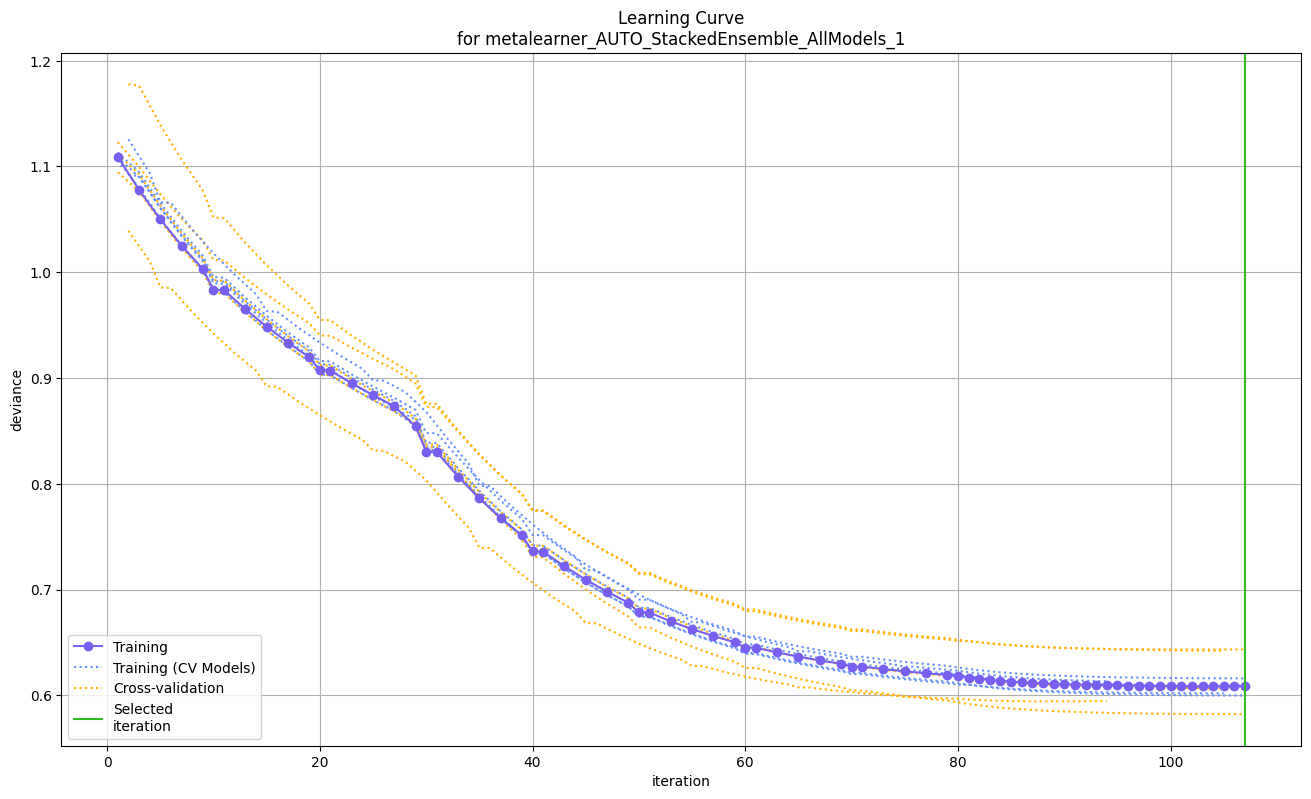

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

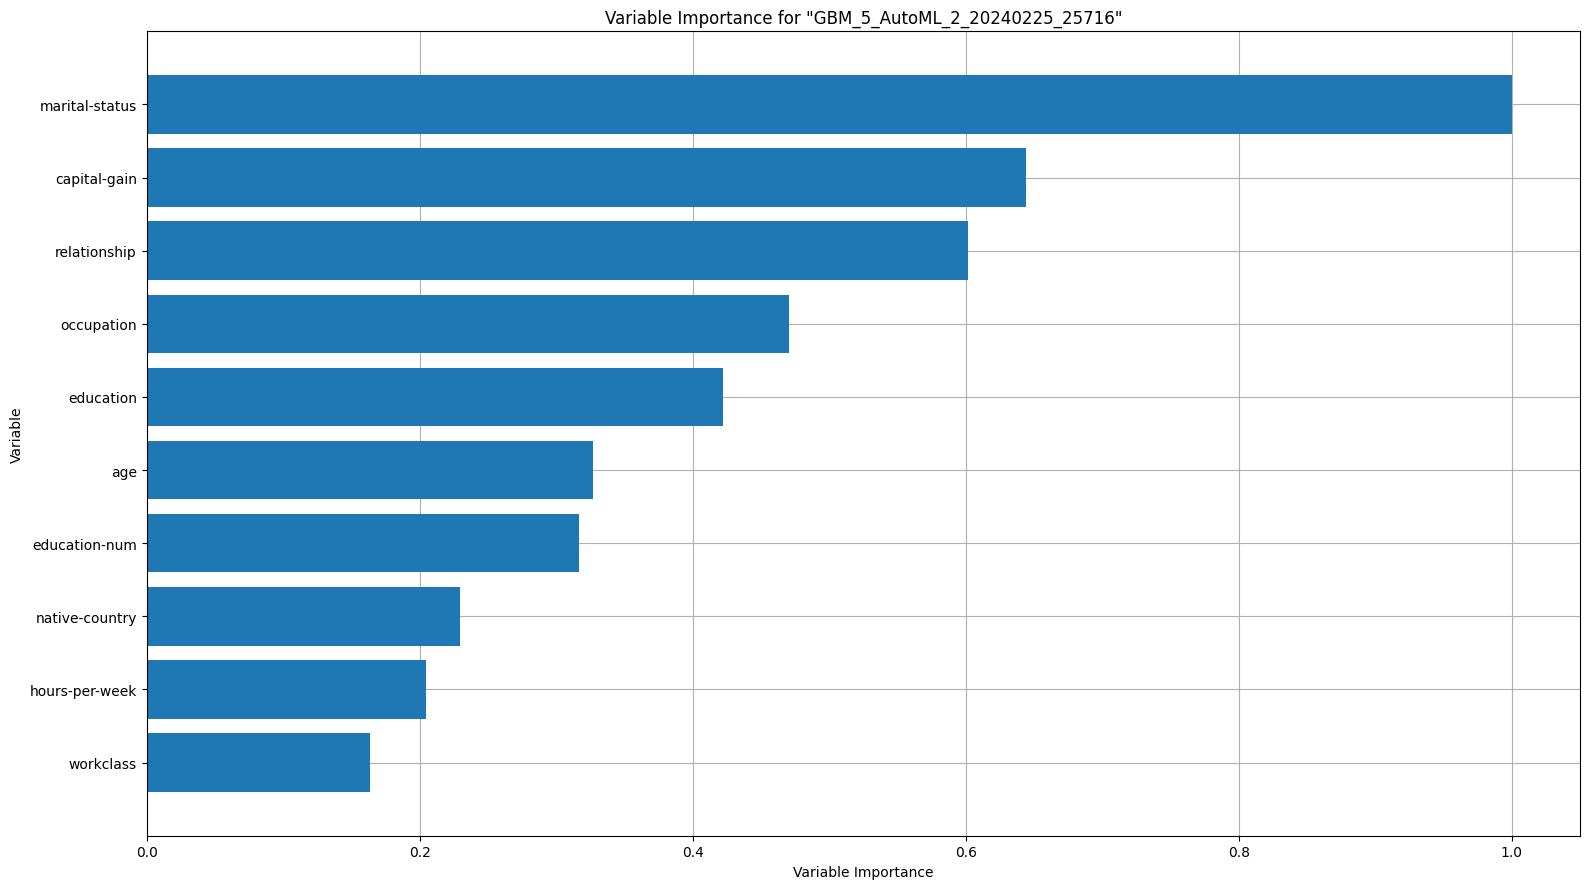

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

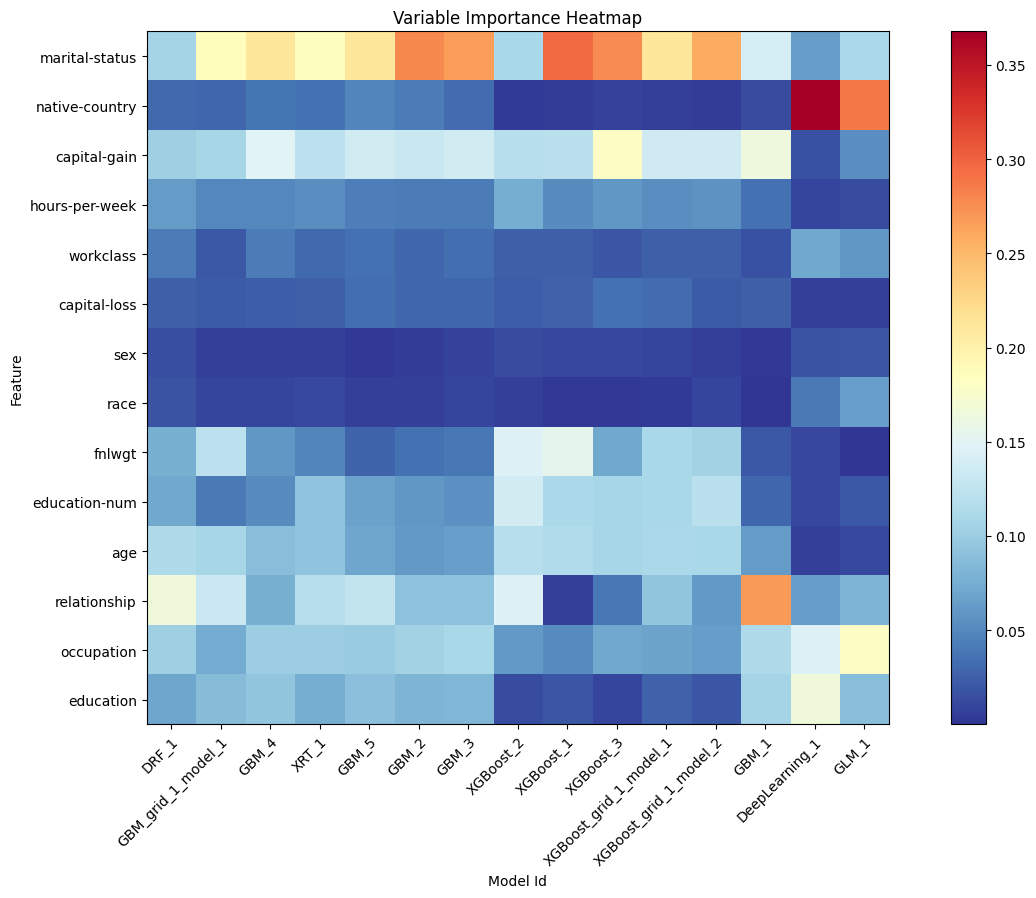

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

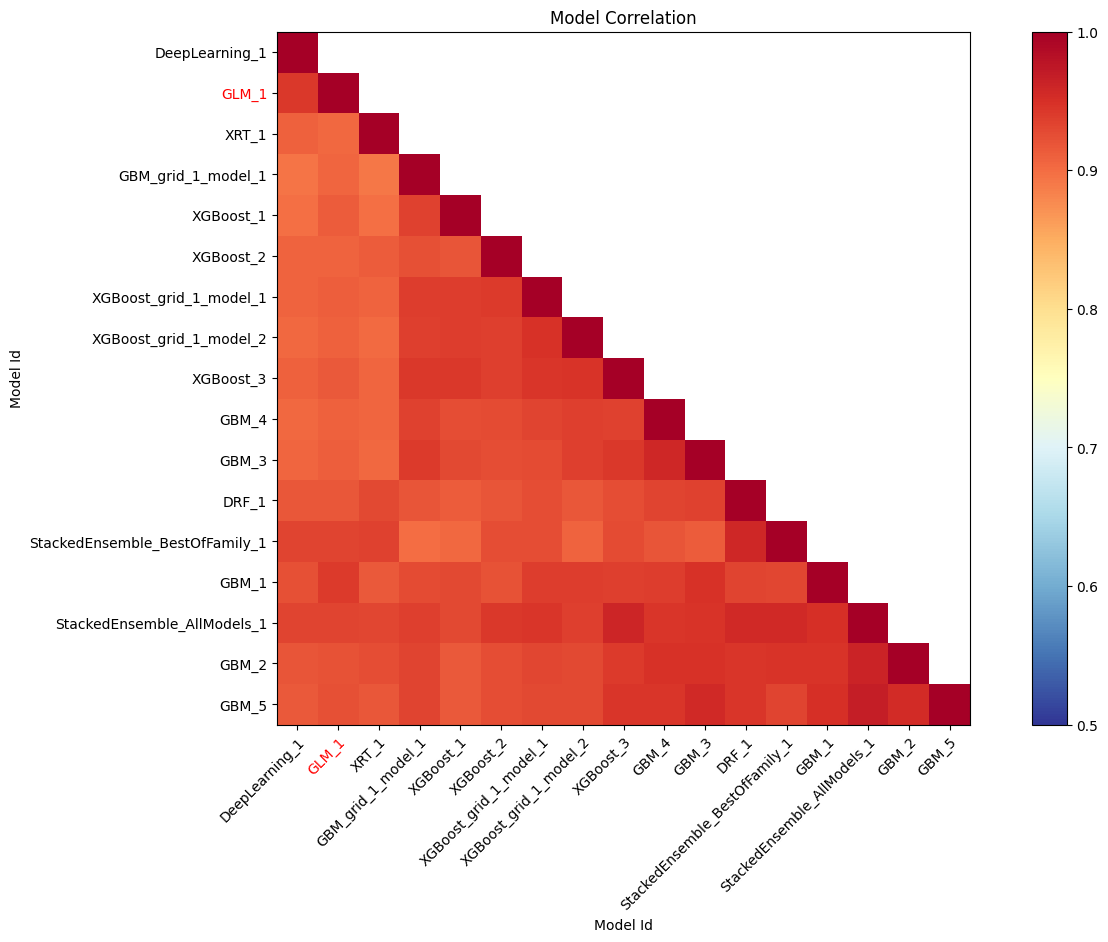

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

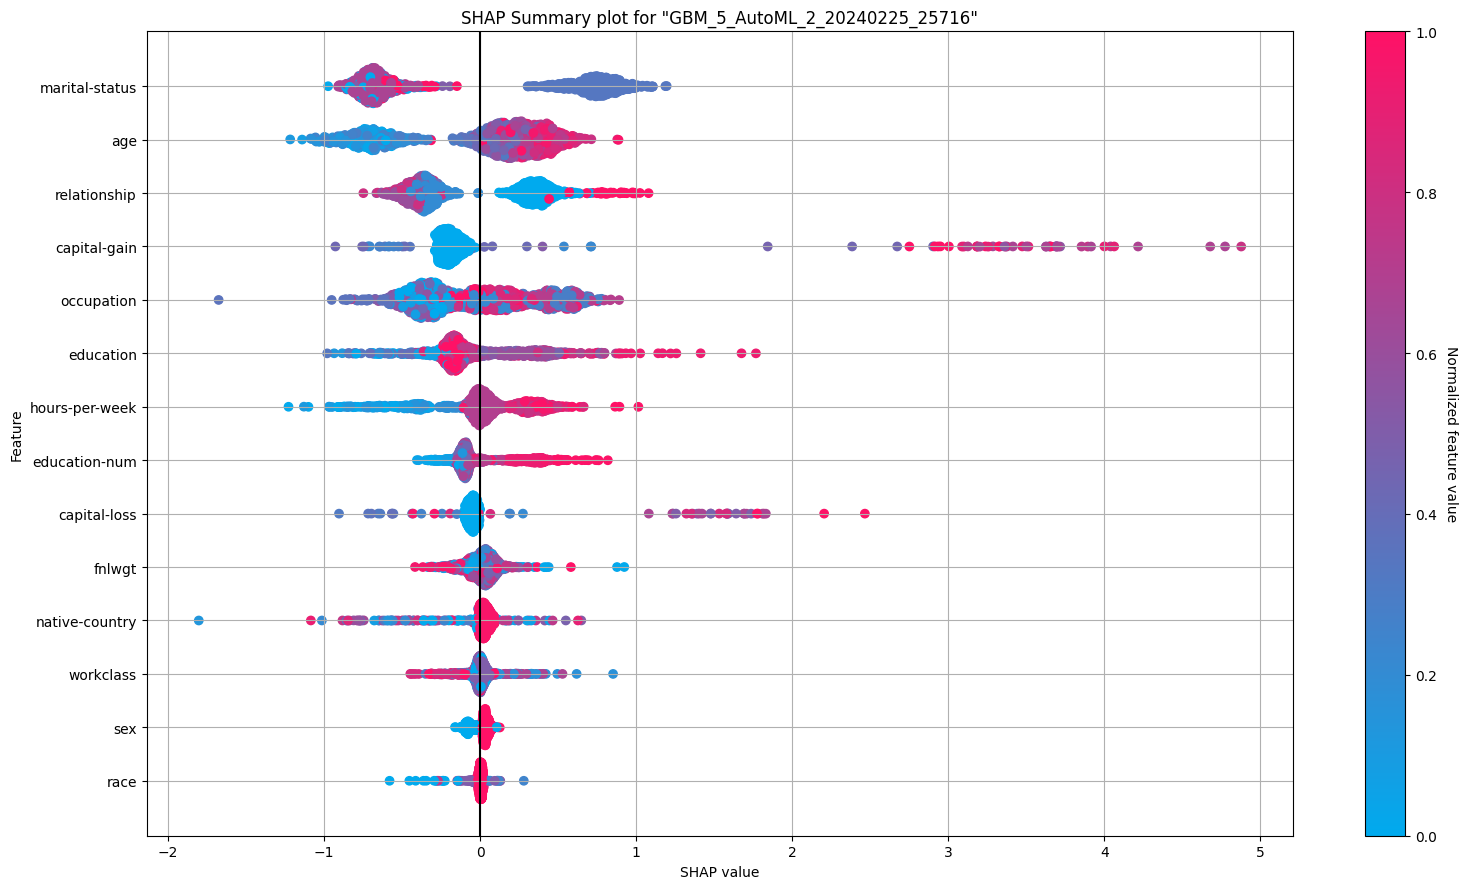

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

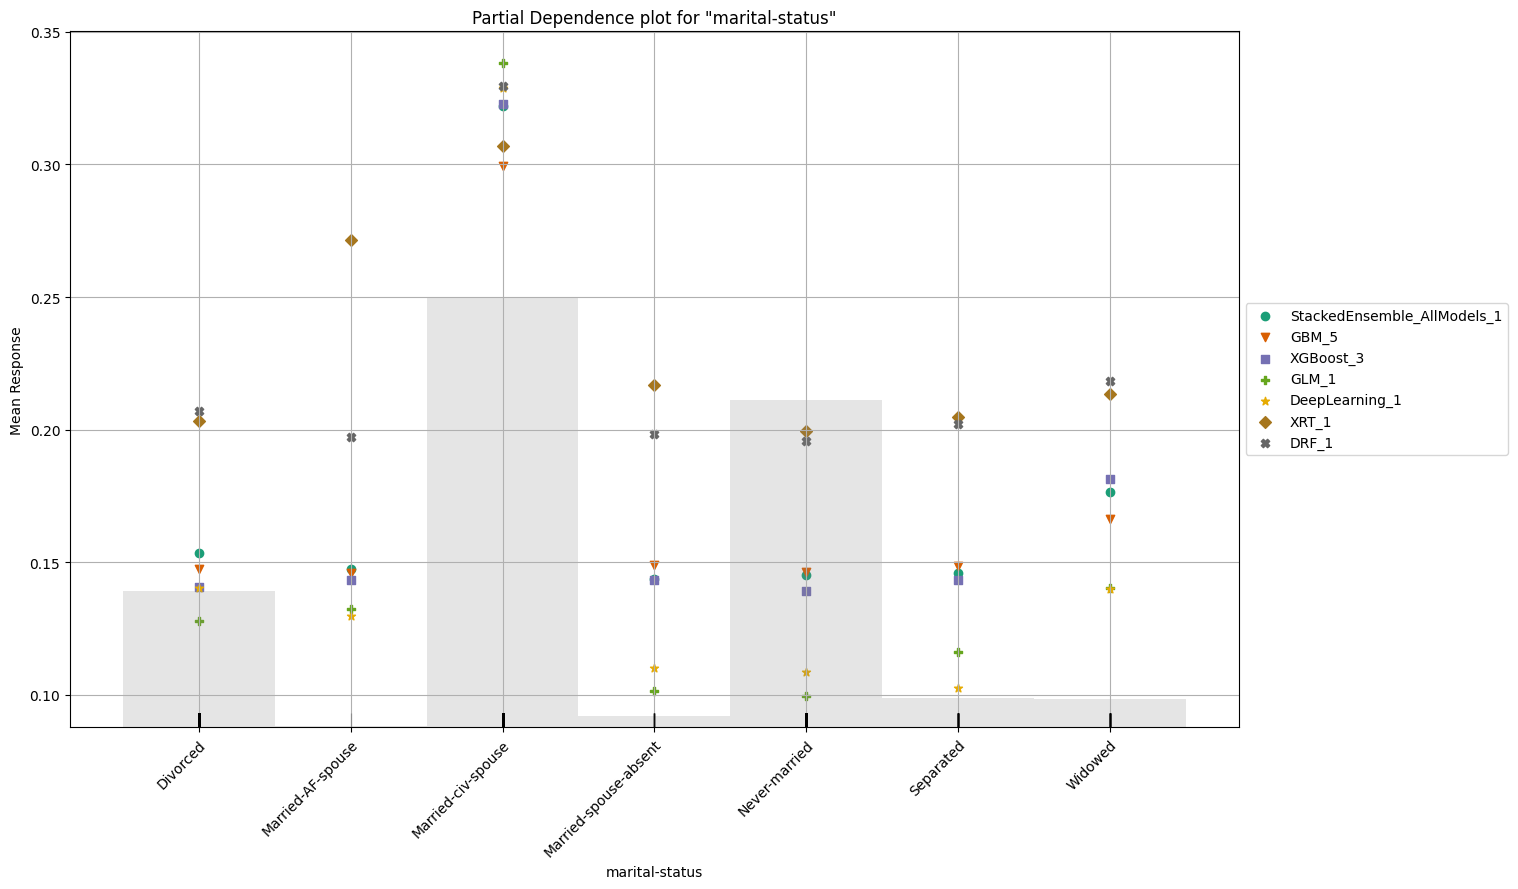

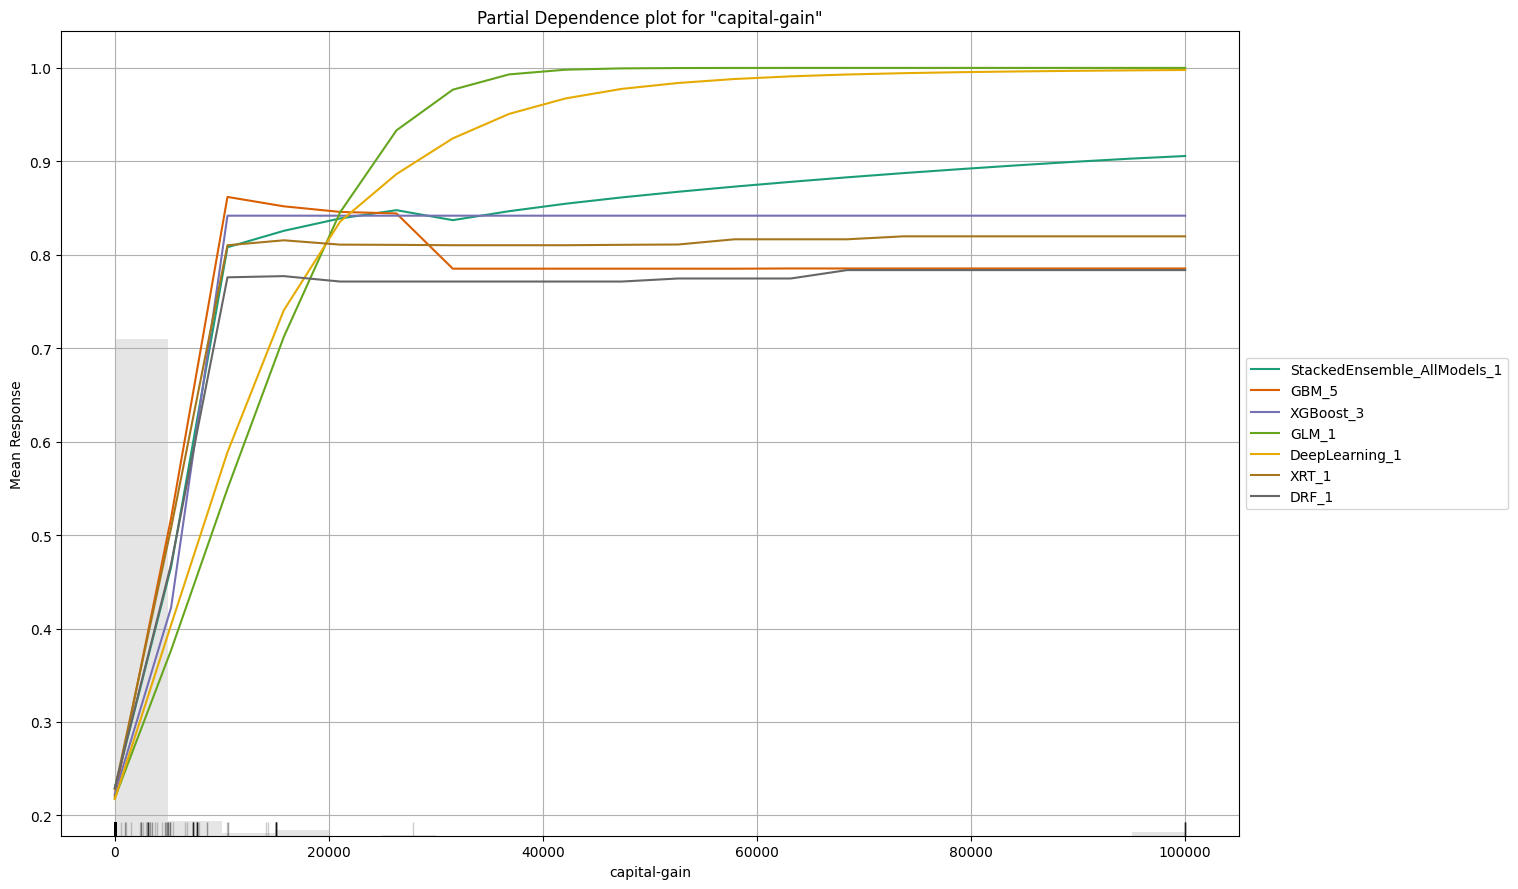

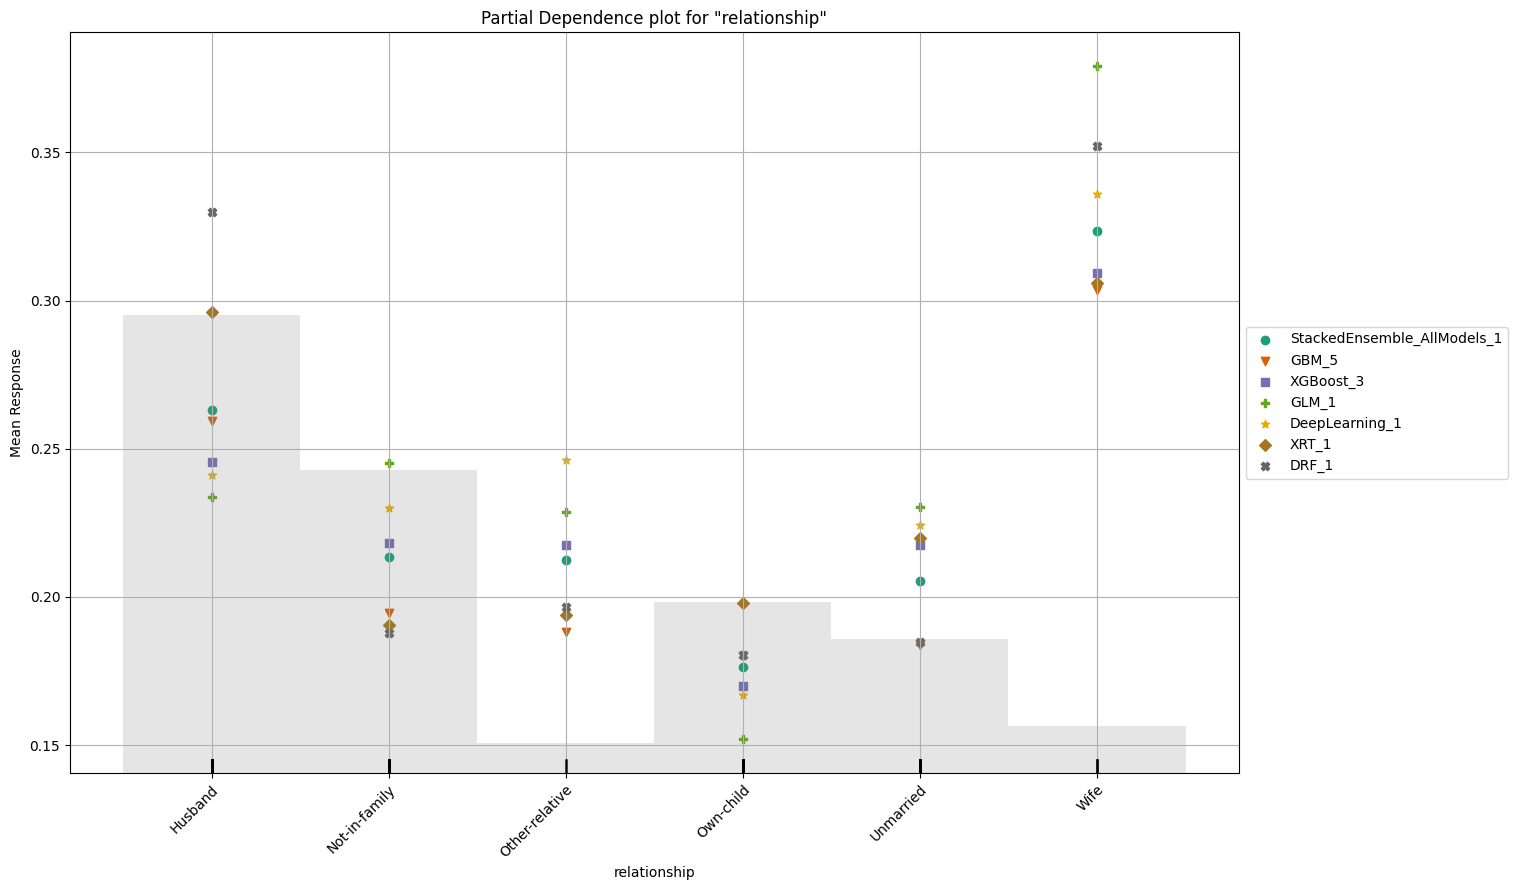

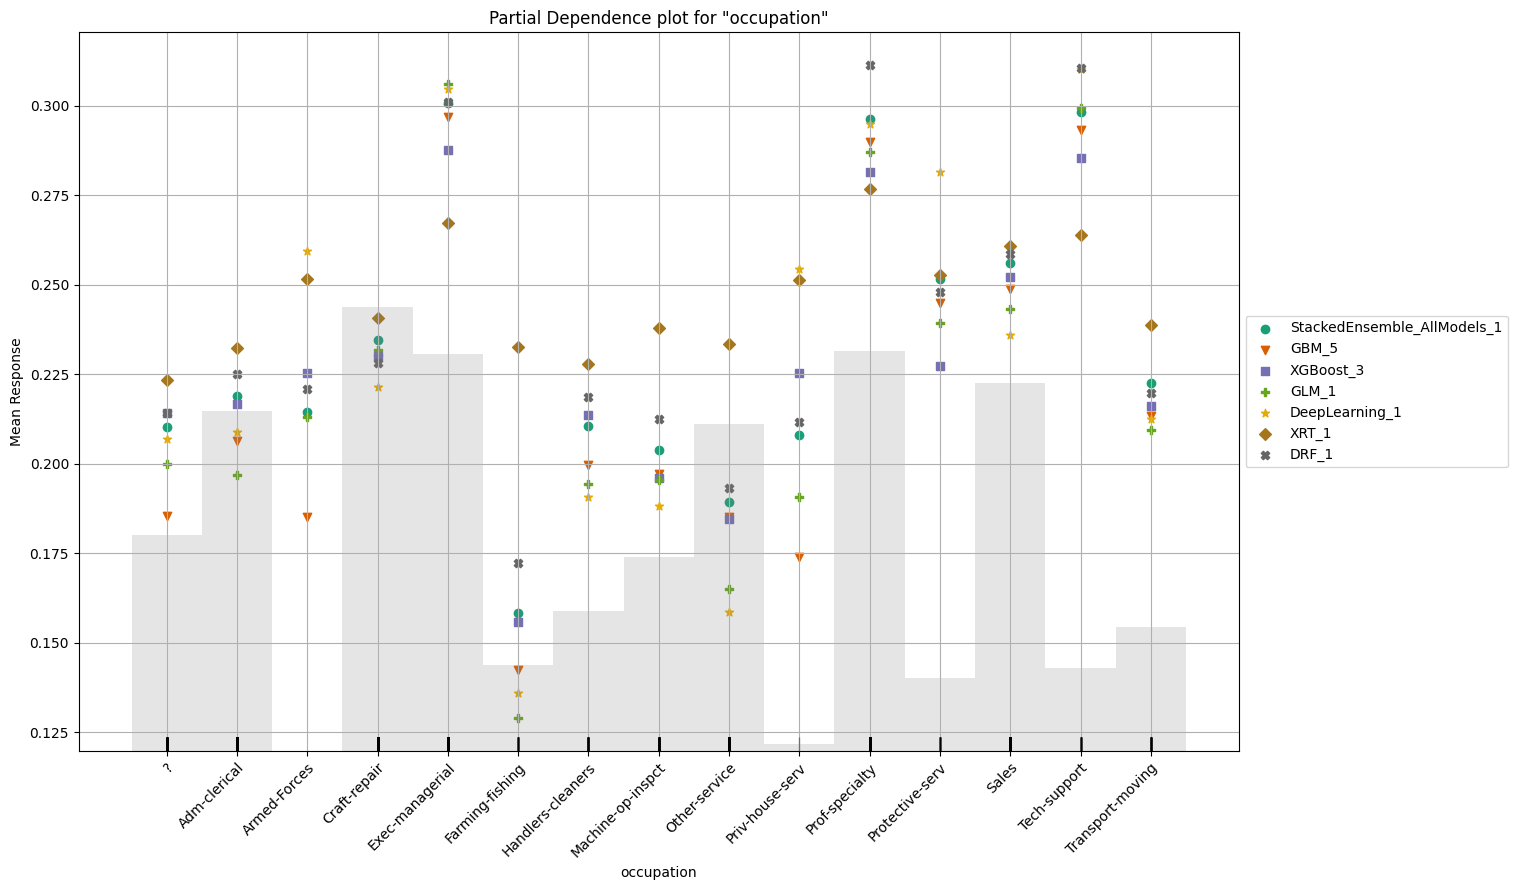

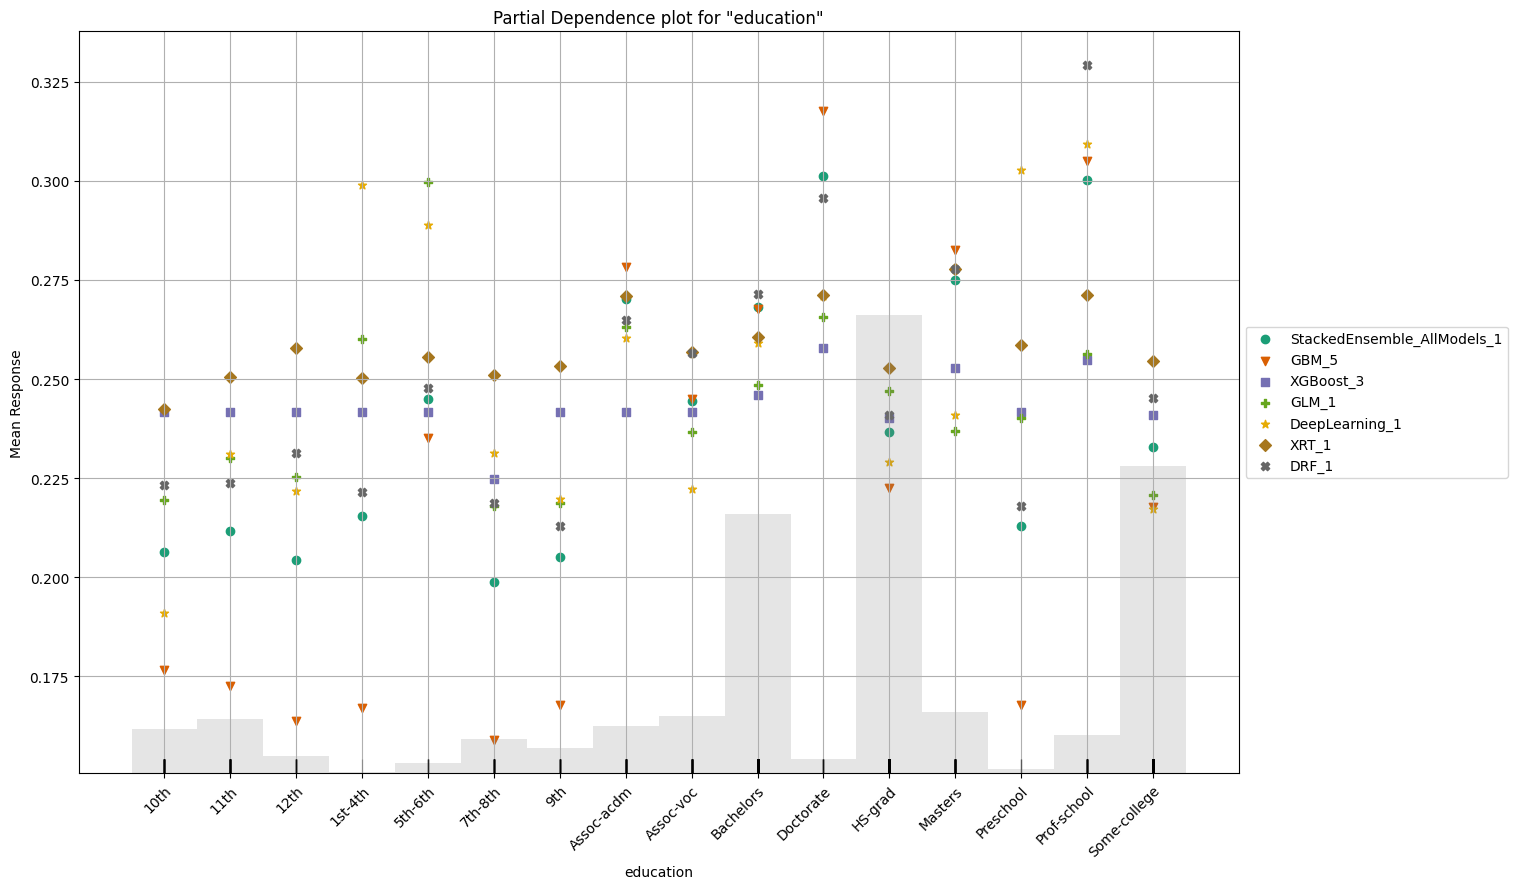

In [47]:
exa = aml.explain(test)


* Is the relationship significant?

--> Yes, the relationship appears significant as indicated by the coefficients and p-values (assuming they are provided) for the variables in your regression models. Significant p-values (typically <0.05) denote that the relationship between the independent variables and the dependent variable is statistically significant.

* Are any model assumptions violated?

--> Without specific diagnostic plots or tests (e.g., QQ plots, residuals vs. fitted values plot), it's hard to conclusively say. Common violations include non-linearity, heteroscedasticity, high leverage points, and autocorrelation in residuals.

* Is there any multicollinearity in the model?

--> Multicollinearity can be assessed using Variance Inflation Factor (VIF) scores. VIF values exceeding 5 (or 10, depending on the source) suggest multicollinearity. If such values are present, it indicates multicollinearity issues.

* In the multivariate models, are predictor variables independent of all the other predictor variables?

--> Predictor variables should be independent of each other to avoid multicollinearity. However, if multicollinearity was detected, this assumption is violated.

* In the multivariate models, rank the most significant predictor variables and exclude insignificant ones from the model.

--> The ranking can be based on the absolute values of the coefficients or the p-values associated with each predictor. The variables with the smallest p-values are the most significant. Insignificant variables (high p-value) should be considered for exclusion.

* Does the model make sense?

--> The model makes sense if it logically fits the data, the variables selected have theoretical justification, and it meets the assumptions of the regression analysis.

* Does regularization help?

--> Regularization (L1/L2 or Elastic Net) helps if it improves model performance on validation sets, reduces overfitting by penalizing large coefficients, and helps in feature selection (L1 regularization).

* Which independent variables are significant?

--> Significant variables are those with low p-values (typically <0.05) and possibly with larger absolute coefficients, indicating a strong effect on the dependent variable.

* Which hyperparameters are important?

--> In the context of regularization, important hyperparameters include the regularization strength (lambda or alpha) and, for Elastic Net, the mix ratio between L1 and L2 regularization. The selection of these hyperparameters significantly impacts model performance and should be determined through cross-validation.


REFERENCES:

1. https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/6105_AutoML_The_World_Happiness_Data.ipynb
2. chatgpt

MIT License

Copyright (c) 2024 nikitagupta09

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.